<a href="https://colab.research.google.com/github/mayad-a/Insurance/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("Insurance.csv")

In [ ]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
print("\nDataset Description:")
print(data.describe())


Dataset Description:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for column in categorical_cols:
    data[column] = data[column].astype('category')

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print(data.info())

Numerical Columns: Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Categorical Columns: Index(['sex', 'smoker', 'region'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB
None


In [ ]:
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")

sex: 2 unique values
smoker: 2 unique values
region: 4 unique values


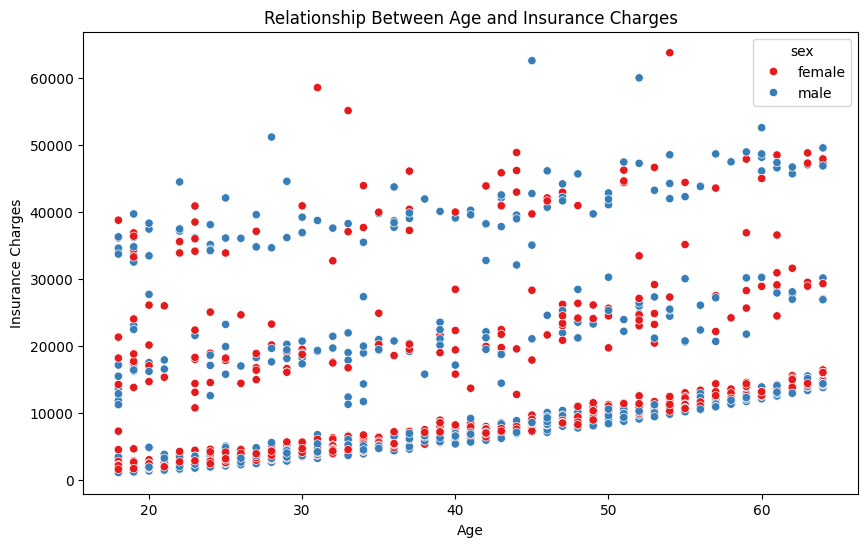

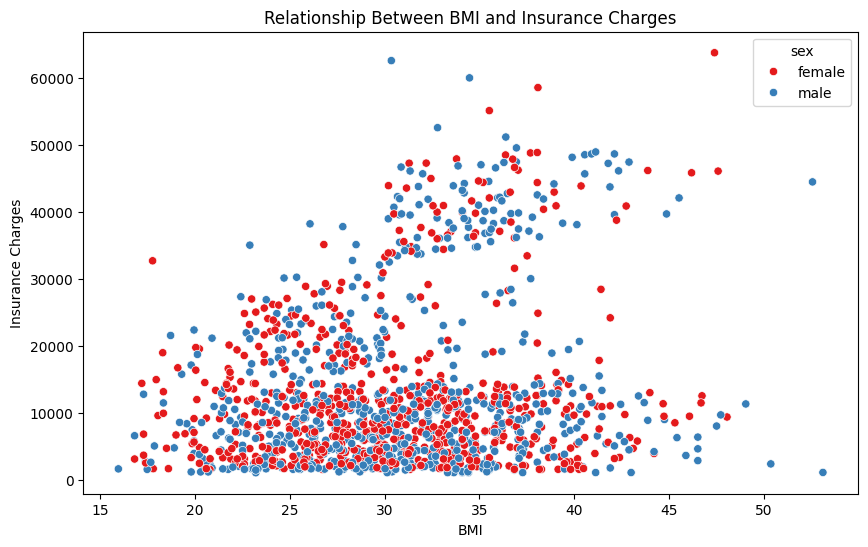

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the relationship between age and insurance charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='charges', hue='sex', palette='Set1')
plt.title('Relationship Between Age and Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

# Plot the relationship between BMI and insurance charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bmi', y='charges', hue='sex', palette='Set1')
plt.title('Relationship Between BMI and Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()


Missing values in each column:
          Missing Count  Percentage
age                   0         0.0
sex                   0         0.0
bmi                   0         0.0
children              0         0.0
smoker                0         0.0
region                0         0.0
charges               0         0.0


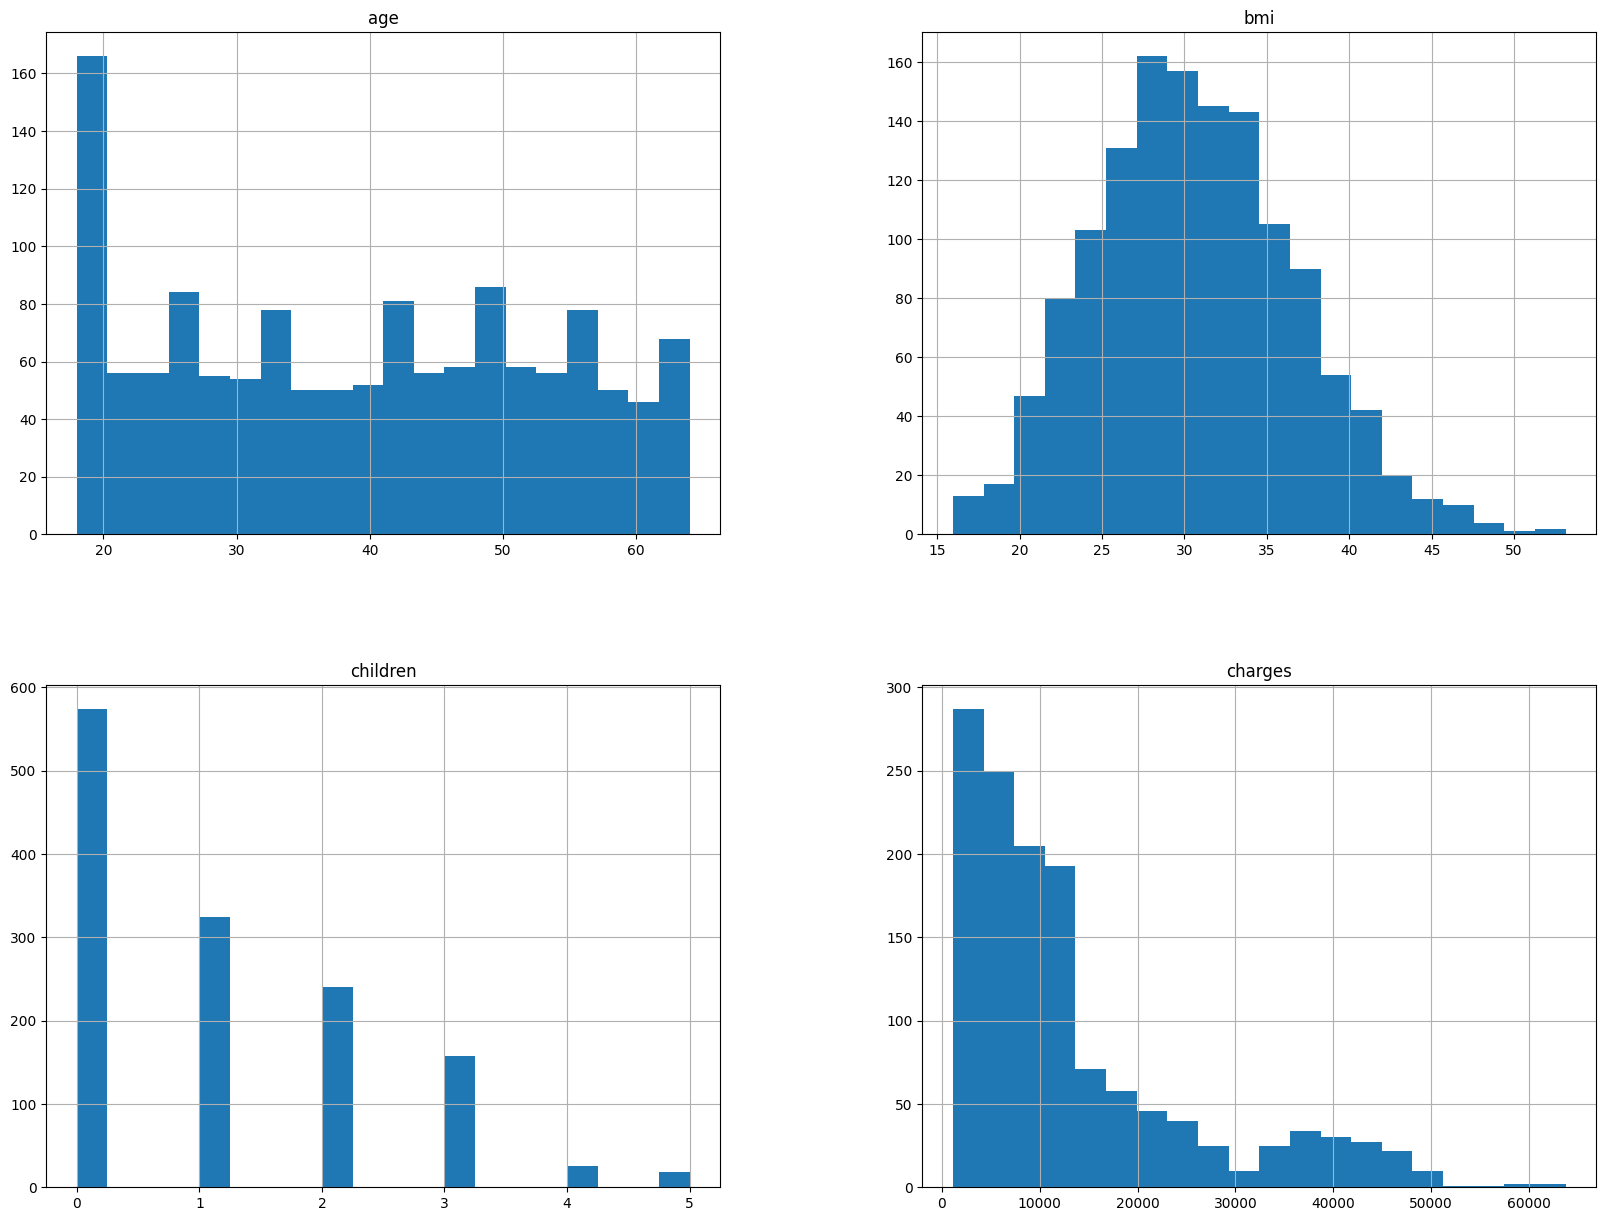

In [ ]:
import matplotlib.pyplot as plt
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("Missing values in each column:")
print(pd.DataFrame({"Missing Count": missing_values, "Percentage": missing_percentage}))
data.hist(bins=20, figsize=(20, 15))
plt.show()

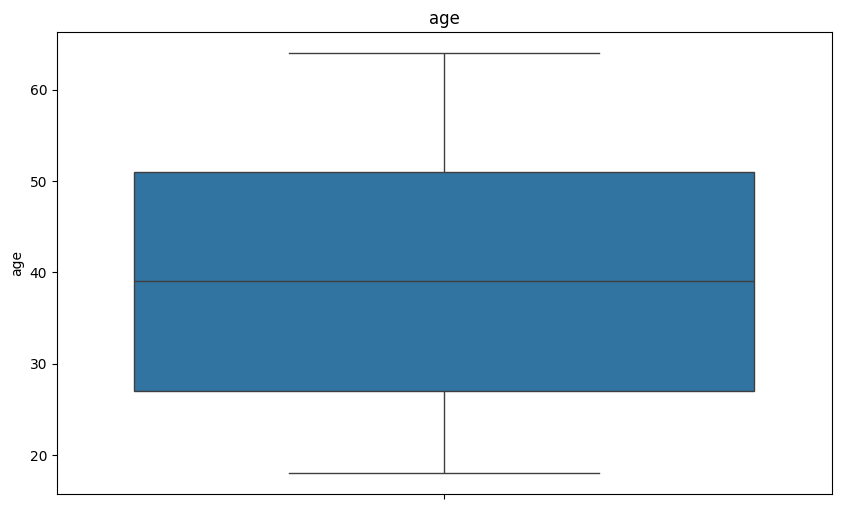

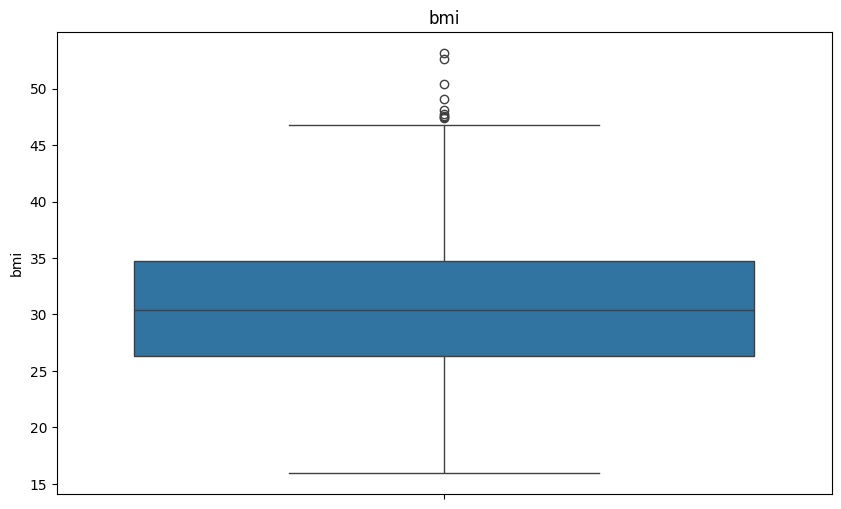

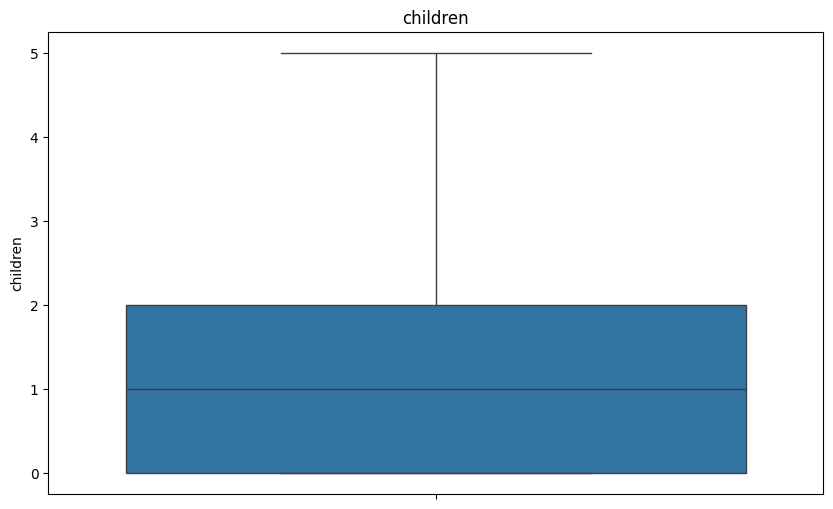

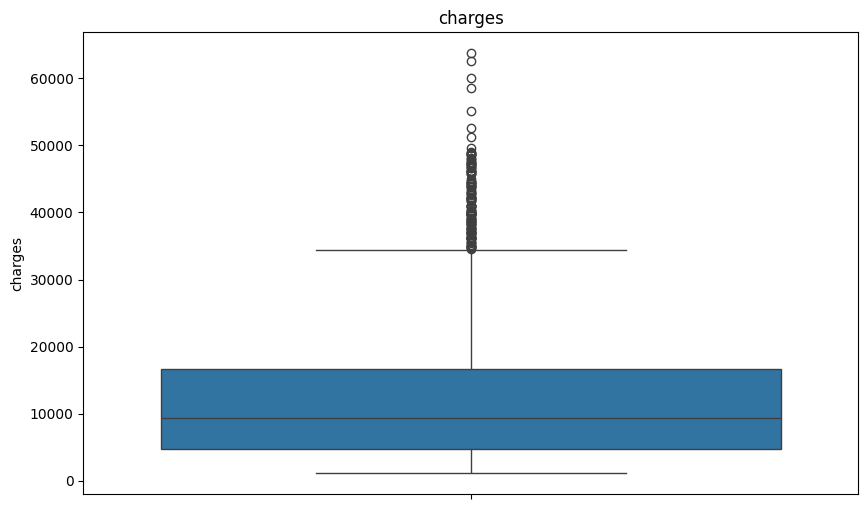

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

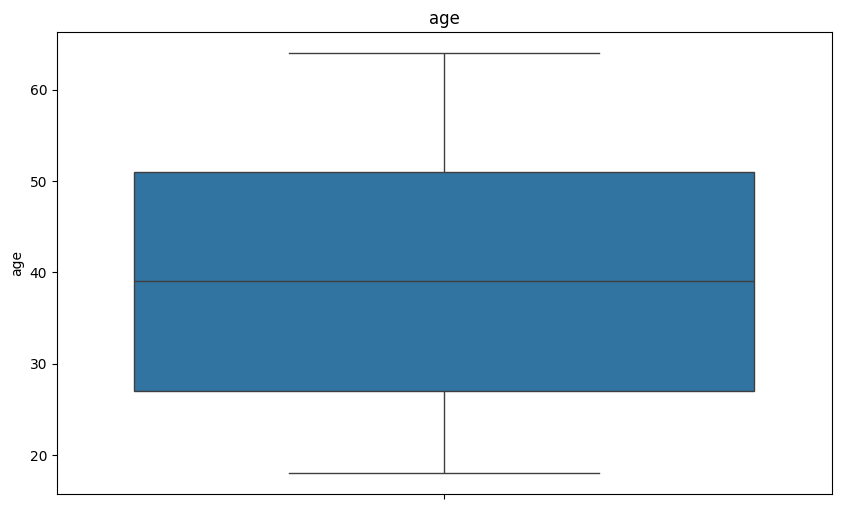

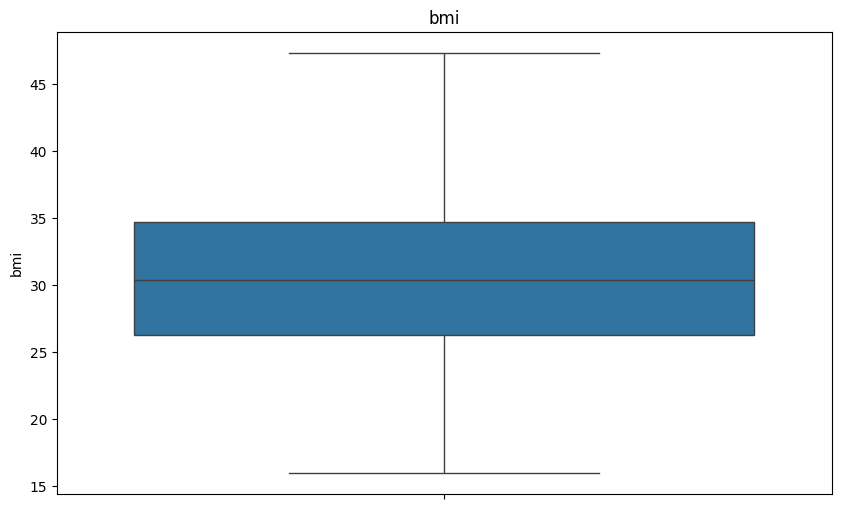

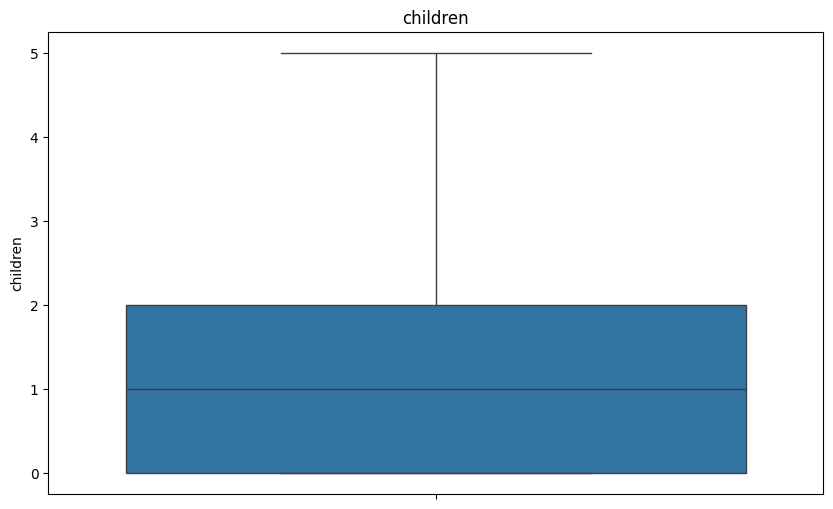

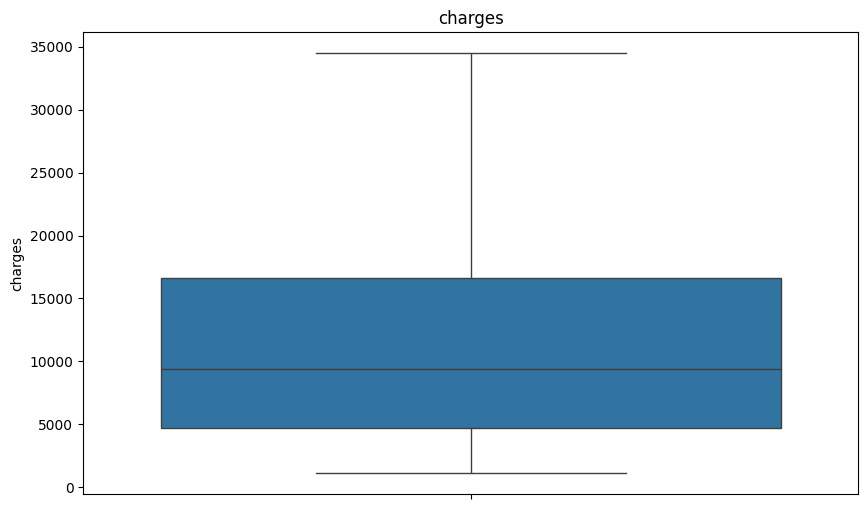

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_cols:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

In [ ]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 1


In [ ]:
data = data.drop_duplicates()
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

print("Categorical columns have been converted to numeric.")

Categorical columns have been converted to numeric.


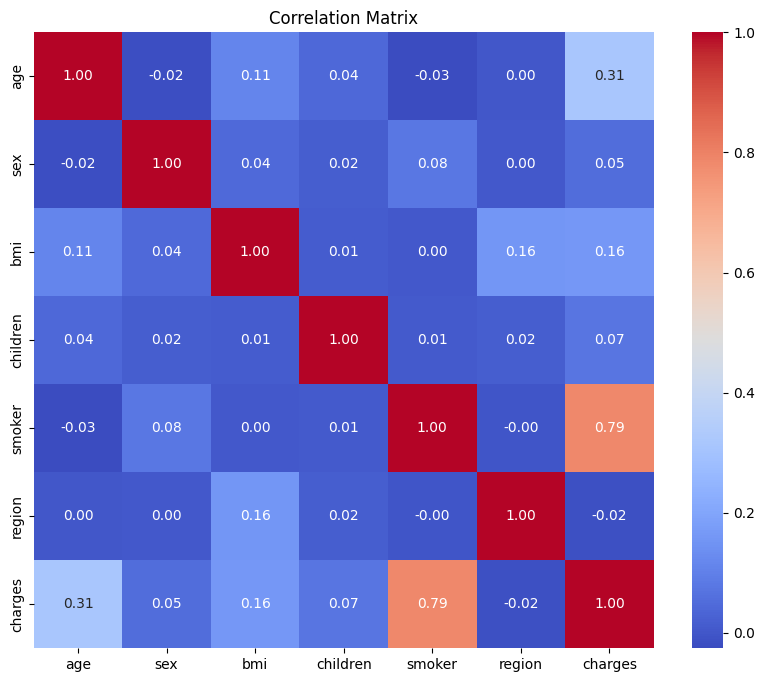

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


smoker      0.618912
bmi         0.169296
age         0.160101
children    0.027770
region      0.014864
sex         0.009057
dtype: float64


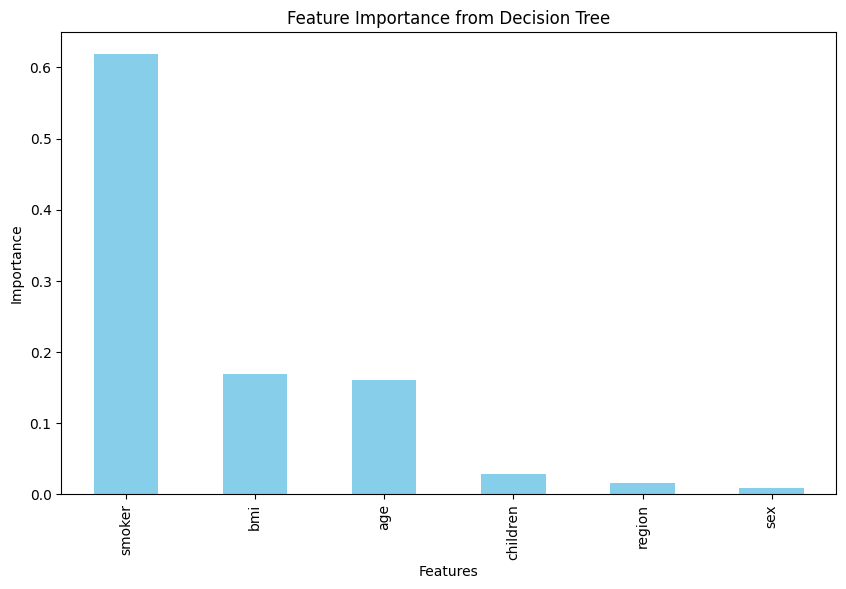

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X = data.drop(columns=['charges'])
y = data['charges']

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, y)

importance = pd.Series(tree_model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False, inplace=True)
print(importance)

plt.figure(figsize=(10, 6))
importance.plot(kind='bar', color='skyblue')
plt.title("Feature Importance from Decision Tree")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


In [ ]:
# حذف الأعمدة ذات التأثير المنخفض (اختياري)
data.drop(columns=['sex'], inplace=True)  # إزالة sex

# فصل الميزات عن الهدف
X = data.drop(columns=['charges'])  # استبدلي 'charges' باسم العمود الهدف
y = data['charges']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (1337, 5)
Target shape: (1337,)


In [ ]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (1069, 5)
Testing set shape: (268, 5)


In [ ]:
print("Transformed Features:")
print(X.head())

Transformed Features:
   age     bmi  children  smoker  region
0   19  27.900         0       1       3
1   18  33.770         1       0       2
2   28  33.000         3       0       2
3   33  22.705         0       0       1
4   32  28.880         0       0       1


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Model Training Completed")

Model Training Completed


In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 3146.46
Mean Squared Error (MSE): 20904777.94
R² Score: 0.8208


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print("\nGradient Boosting Regressor:")
print("MAE:","{:.2f}".format( mean_absolute_error(y_test, y_pred_gb)))
print("MSE:","{:.2f}".format( mean_squared_error(y_test, y_pred_gb)))
print("R² Score:","{:.2f}".format(r2_score(y_test, y_pred_gb)))



Gradient Boosting Regressor:
MAE: 2172.67
MSE: 14775366.15
R² Score: 0.87


In [ ]:
import xgboost as xgb

# إنشاء نموذج XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Regressor:")
print("MAE:","{:.2f}".format(mean_absolute_error(y_test, y_pred_xgb)))
print("MSE:","{:.2f}".format(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:","{:.2f}".format(r2_score(y_test, y_pred_xgb)))


XGBoost Regressor:
MAE: 2059.48
MSE: 14548751.35
R² Score: 0.88
